In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

import nibabel as nib
import xml.etree.ElementTree as ET 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data paths
path_info = 'data/adni/info_3yr15T.csv'
path_images = 'data/adni/images_3yr15T'
path_meta = 'data/adni/metadata_3yr15T_complete'

In [3]:
# View CSV file 
data_info = pd.read_csv(path_info)
print('Total number of samples = ', len(data_info), '\n')
print(data_info.iloc[0])
print(len(data_info))

Total number of samples =  2182 

Image Data ID                                       75150
Subject                                        941_S_1202
Group                                                  CN
Sex                                                     M
Age                                                    78
Visit                                                   3
Modality                                              MRI
Description      MPR; GradWarp; B1 Correction; N3; Scaled
Type                                            Processed
Acq Date                                        8/24/2007
Format                                              NiFTI
Downloaded                                            NaN
Name: 0, dtype: object
2182


Patient ID = 002_S_0295, shape = (256, 256, 166)
Patient ID = 002_S_0413, shape = (256, 256, 166)
Patient ID = 002_S_0619, shape = (256, 256, 166)
Patient ID = 005_S_0221, shape = (256, 256, 166)
Patient ID = 005_S_0223, shape = (256, 256, 166)
Patient ID = 005_S_0324, shape = (256, 256, 166)
Patient ID = 005_S_0546, shape = (256, 256, 166)
Patient ID = 116_S_0657, shape = (256, 256, 180)
Patient ID = 116_S_0752, shape = (256, 256, 180)
Patient ID = 116_S_0834, shape = (256, 256, 180)
Patient ID = 116_S_1232, shape = (256, 256, 180)
Patient ID = 136_S_0196, shape = (256, 256, 166)
Patient ID = 136_S_0299, shape = (256, 256, 170)
Patient ID = 136_S_0300, shape = (256, 256, 170)
Patient ID = 136_S_0300, shape = (256, 256, 170)
Patient ID = 136_S_0426, shape = (256, 256, 170)
Patient ID = 136_S_0426, shape = (256, 256, 170)
Patient ID = 136_S_0429, shape = (256, 256, 170)
Patient ID = 136_S_0429, shape = (256, 256, 170)
Patient ID = 136_S_0579, shape = (256, 256, 170)
Patient ID = 136_S_0

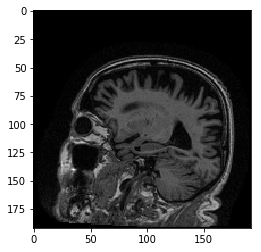

In [4]:
# Visualize images
folder_names = os.listdir(path_images)
for folder in folder_names:
    img_paths = glob(path_images+'/'+folder+'/*/*/*/*.nii', recursive=True)
    for path in img_paths:
        img = nib.load(path)
        print('Patient ID = {}, shape = {}'.format(folder, img.shape))
#         print(img.shape, np.diag(img.header.get_base_affine())[:-1], )
plt.imshow(img.get_data()[...,100], cmap='gray')
plt.show()

In [5]:
img.header.get_base_affine()

array([[  -1.25276494,    0.        ,    0.        ,  119.6390518 ],
       [   0.        ,    1.24742377,    0.        , -119.12896985],
       [   0.        ,    0.        ,    1.20269036,  -95.61388385],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [6]:
# Explore Meta data
metafiles = glob(path_meta+'/*.xml')
print('Number of meta files = ', len(metafiles))

slice_th = []
x = []; y = []; z = []
for f in metafiles:
    tree = ET.parse(f)
    root = tree.getroot()
    vals = [x for x in root.iter('protocol')]
    items = [x.items()[0][1] for x in vals]
    text = [x.text for x in vals]
    slice_th.append(text[items.index('Slice Thickness')])
    x.append(text[items.index('Matrix X')])
    y.append(text[items.index('Matrix Y')])
    z.append(text[items.index('Matrix Z')])
    if text[items.index('Matrix Z')]==124.0:
        print('124: ', f)
    elif text[items.index('Matrix Z')]==184.0:
        print('184: ', f)
x = np.array(x).astype(np.float)
y = np.array(y).astype(np.float)
z = np.array(z).astype(np.float)
print('Slice Thickness: min = {} mm, max = {} mm'.format(min(slice_th), max(slice_th)))
print('X dim: min = {}, max = {}, mean = {}, std = {}'.format(min(x), max(x), np.mean(x), np.std(x)))
print('Y dim: min = {}, max = {}, mean = {}, std = {}'.format(min(y), max(y), np.mean(y), np.std(y)))
print('Z dim: min = {}, max = {}, mean = {}, std = {}'.format(min(z), max(z), np.mean(z), np.std(z)))

fmin = metafiles[np.argmin(z)]
fmax = metafiles[np.argmax(z)]
print(fmin)
print(fmax)

Number of meta files =  2176
Slice Thickness: min = 1.2 mm, max = 1.2 mm
X dim: min = 192.0, max = 256.0, mean = 232.73529411764707, std = 30.784649367472106
Y dim: min = 192.0, max = 256.0, mean = 232.73529411764707, std = 30.784649367472106
Z dim: min = 124.0, max = 184.0, mean = 166.11488970588235, std = 6.692815973086359
data/adni/metadata_3yr15T_complete/ADNI_002_S_1070_MPR-R__GradWarp__B1_Correction__N3__Scaled_S33346_I60478.xml
data/adni/metadata_3yr15T_complete/ADNI_032_S_0147_MPR____N3__Scaled_S19428_I124906.xml


In [7]:
print(np.where(y==192)[0][:3])
print(np.where(x==192)[0][:3])
print(np.where(y==256)[0][:3])
print(np.where(x==256)[0][:3])
print(metafiles[9])
print(metafiles[1])

[ 9 10 11]
[ 9 10 11]
[0 1 2]
[0 1 2]
data/adni/metadata_3yr15T_complete/ADNI_023_S_0058_MPR__GradWarp__B1_Correction__N3__Scaled_2_S10335_I118832.xml
data/adni/metadata_3yr15T_complete/ADNI_002_S_0295_MPR__GradWarp__B1_Correction__N3__Scaled_2_S21856_I118692.xml


In [8]:
# Visualize images
import os
from skimage.io import imsave

path_images = 'data/adni/images_slices'
dest_path = 'slice_data'
if os.path.exists(dest_path)==False:
    os.mkdir(dest_path)

def normalize(img):
    m, M = img.min(), img.max()
    img = 255*(img-m)/(M-m)
    return img.astype(int)
    
def save_slices(img, path, view, freq):
    save_path = os.path.join(path, view)
    if os.path.exists(save_path)==False:
        os.mkdir(save_path)
    if view == 'axial':
        img_slices = img[::20, :, :]
        for i in range(img_slices.shape[0]):
            img_slice = normalize(img_slices[i,:,:])
            slice_path = os.path.join(save_path, str(i*20)+'.jpg')
            imsave(slice_path, img_slice)    
    elif view == 'sagittal':
        img_slices = img[:, :, ::20]
        for i in range(img_slices.shape[2]):
            img_slice = normalize(img_slices[:,:,i])
            slice_path = os.path.join(save_path, str(i*20)+'.jpg')
            imsave(slice_path, img_slice)
    elif view == 'coronal':
        img_slices = img[:, ::20, :]
        for i in range(img_slices.shape[1]):
            img_slice = normalize(img_slices[:,i,:])
            slice_path = os.path.join(save_path, str(i*20)+'.jpg')
            imsave(slice_path, img_slice)

folder_names = os.listdir(path_images)
for folder in folder_names:
    img_paths = glob(path_images+'/'+folder+'/*/*/*/*.nii', recursive=True)
    for path in img_paths:
        folder_path = os.path.join(dest_path, os.path.basename(path[:-4]))
        if os.path.exists(folder_path)==False:
            os.mkdir(folder_path)
        img = nib.load(path).get_data()
        print(img.shape, folder)
#         save_slices(img, folder_path, 'axial', freq=20)
#         save_slices(img, folder_path, 'sagittal', freq=20)
#         save_slices(img, folder_path, 'coronal', freq=20)
#         plt.imshow(img[100,:,:], cmap='gray')
#         plt.title(folder+str(img[:,:,100].shape))
#         plt.figure()
# plt.show()

(256, 256, 166) 002_S_0295
(256, 256, 124) 002_S_1070
(256, 256, 166) 002_S_1070
(192, 192, 160) 023_S_0058
(256, 256, 184) 032_S_0147
(256, 256, 184) 032_S_0147
(256, 256, 184) 032_S_0147
(256, 256, 184) 032_S_0147
(256, 256, 184) 032_S_0147


In [9]:
a = img[::20, :, :]
print(a.shape)

(13, 256, 184)


## TADPOLE DATA EXPLORATION

In [53]:
path_tadpole = 'data/adni/challenges/tadpole_challenge/TADPOLE_D1_D2.csv'
df_tadpole = pd.read_csv(path_tadpole)
df1 = df_tadpole[['RID','PTID','VISCODE']]
print(df1.head())
print('Number of rows = ', len(df1))
print('Features: ', df_tadpole.columns)

# path_tadpole_dict = 'data/adni/challenges/tadpole_challenge/TADPOLE_D1_D2_Dict.csv'
# df_tadpole_dict = pd.read_csv(path_tadpole_dict)
# df2 = df_tadpole_dict[['FLDNAME','TEXT']]
# df2.to_csv('tadpole_dict.csv')

ven = df_tadpole.Ventricles.values
print(np.min(ven), np.max(ven), ven)

   RID        PTID VISCODE
0    2  011_S_0002      bl
1    3  011_S_0003      bl
2    3  011_S_0003     m06
3    3  011_S_0003     m12
4    3  011_S_0003     m24
Number of rows =  12741
Features:  Index(['RID', 'PTID', 'VISCODE', 'SITE', 'D1', 'D2', 'COLPROT', 'ORIGPROT',
       'EXAMDATE', 'DX_bl',
       ...
       'PHASE_UPENNBIOMK9_04_19_17', 'BATCH_UPENNBIOMK9_04_19_17',
       'KIT_UPENNBIOMK9_04_19_17', 'STDS_UPENNBIOMK9_04_19_17',
       'RUNDATE_UPENNBIOMK9_04_19_17', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17',
       'COMMENT_UPENNBIOMK9_04_19_17', 'update_stamp_UPENNBIOMK9_04_19_17'],
      dtype='object', length=1907)
nan nan [118233.  84599.  88580. ...     nan     nan     nan]


In [25]:
# Compare with ADNI meta data
metafiles = glob(path_meta+'/*.xml')
print('Number of meta files = ', len(metafiles))
visit_dict = {'ADNI Screening':'bl',
              'ADNI1/GO Month 6':'m06',
              'ADNI1/GO Month 12': 'm12',
              'ADNI1/GO Month 18' : 'm18',
              'ADNI1/GO Month 24': 'm24',
              'ADNI1/GO Month 36': 'm36',
             'No Visit Defined': 'none'}

meta_names = []
meta_viscodes = []
for f in metafiles:
    tree = ET.parse(f)
    root = tree.getroot()
    vals = [x for x in root.iter('subject')]
    meta_names.append([x for x in vals[0].iter('subjectIdentifier')][0].text)
    
    vals = [x for x in root.iter('visit')]
    meta_viscodes.append([x for x in vals[0].iter('visitIdentifier')][0].text)

# Overlap assessment
count = 0
for name, mviscode in zip(meta_names, meta_viscodes):
    viscode = visit_dict[mviscode]
    if name in df1.PTID.values:
        if viscode in df1[df1.PTID==name]['VISCODE'].values:
            count += 1
print('num_rows in adni_data = {}, 'count, len(meta_names))
print(meta_names[:5], meta_viscodes[:5])
print(df1[df1.PTID=='002_S_0295'])

# ADNI data analysis
adni_visits = {}
for name, mviscode in zip(meta_names, meta_viscodes):
    viscode = visit_dict[mviscode]
    if name not in adni_visits:
        adni_visits[name] = [mviscode]
    else:
        adni_visits[name] += [mviscode]
num_visits = []
for name in adni_visits:
    num_visits.append(len(adni_visits[name]))
print(np.min(num_visits), np.max(num_visits), np.mean(num_visits), np.std(num_visits))

Number of meta files =  2176
2175 2176
['002_S_0295', '002_S_0295', '002_S_0295', '002_S_0295', '002_S_0295'] ['ADNI Screening', 'ADNI1/GO Month 6', 'ADNI Screening', 'ADNI1/GO Month 6', 'ADNI1/GO Month 12']
      RID        PTID VISCODE
716   295  002_S_0295      bl
717   295  002_S_0295     m06
718   295  002_S_0295     m12
719   295  002_S_0295     m24
720   295  002_S_0295     m36
721   295  002_S_0295     m48
722   295  002_S_0295     m60
723   295  002_S_0295     m72
6533  295  002_S_0295     m18
6534  295  002_S_0295     m30
6535  295  002_S_0295     m42
6536  295  002_S_0295     m54
6537  295  002_S_0295     m66
2 11 5.696335078534031 1.3524990144386257


### TADPOLE Data Analysis
- Basic Stats:
    - num_rows = 12741
- Overlap with tadpole data:
    - num_rows = 2176
    - num_overlap with tadpole = 2175
    - Number of visits: Min = 2, Max = 11, Mean = 5.7, Std = 1.35
- Remaining features from TADPOLE:
    - MRI images: One for each visit, shape around (256, 256, 170)
    - Demographics: Gender, Age, Education, Ethnicity, Race, Marital (at baseline)
    - Cognitive tests: CDR-SB, ADAS11 (upto 70 points), MMSE, RAVLT_immediate
    - MRI measures: Hippocampus, WholeBrain, Entorhinal, MidTemp
    - PET measures: FDG, AV45
    - CSF measures: ABETA_UPENNBIOMK9_04_19_17  (amyloid-beta level in CSF), TAU_UPENNBIOMK9_04_19_17 (tau level), PTAU_UPENNBIOMK9_04_19_17 (phosphorylated tau level)
    -  Risk factors: 
        - APOE4: 0/1, (APOE E4) is a gene that is the largest known risk factor for AD. Subjects with APOE E4 have a risk 10 to 30 times higher of developing AD compared to non-carriers
        - Age: the older subjects are the more likely they are to develop AD
- Medical History:
    - Not available in TADPOLE, but present in ADNI
    - Binary variables for pre-existing conditions. Variable info [here](http://adni.loni.usc.edu/data-dictionary-search/?q=MHPSYCH)
- Evaluation Measures:
    - DX : NL (Normal), MCI (Mild Cognitive Impariment), AD (Alzheimers)
    - ADAS13 : Upto 85 points, more info [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3873823/)
    - Ventricles : Ventricles volume, continuous variable
    
### Project Data
#### Total data (3yr 1.5T)
1. num_rows = 2176 -> each row is a visit
2. Number of visits: Min = 2, Max = 11, Mean = 5.7, Std = 1.35

#### Data Modalities
1. **Structured Covariates**: Gender, Age, Education, Ethnicity, Race, Marital (at baseline), APOE4 gene, medical history.
2. **Longitudinal Images**: MRI, one for each visit, shape around (256,256,170)
3. **Other Longitudinal Data**: Cognitive test scores (CDR-SB, ADAS11, MMSE, RAVLT_immediate)
4. **Other data**: Features extracted from MRI, PET images, CSF measures, DTI measures

#### Evaluation Measures
1. DX : NL (Normal), MCI (Mild Cognitive Impariment), AD (Alzheimers)
2. ADAS13 : Upto 85 points
3. Ventricles

   


In [39]:
medhist = pd.read_csv('MEDHIST.csv')
print(medhist.columns)
print(medhist.iloc[0])

Index(['Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE',
       'USERDATE2', 'EXAMDATE', 'MHSOURCE', 'MHPSYCH', 'MH2NEURL', 'MH3HEAD',
       'MH4CARD', 'MH5RESP', 'MH6HEPAT', 'MH7DERM', 'MH8MUSCL', 'MH9ENDO',
       'MH10GAST', 'MH11HEMA', 'MH12RENA', 'MH13ALLE', 'MH14ALCH', 'MH14AALCH',
       'MH14BALCH', 'MH14CALCH', 'MH15DRUG', 'MH15ADRUG', 'MH15BDRUG',
       'MH16SMOK', 'MH16ASMOK', 'MH16BSMOK', 'MH16CSMOK', 'MH17MALI',
       'MH18SURG', 'MH19OTHR', 'MHCOMMEN', 'update_stamp'],
      dtype='object')
Phase                           ADNI1
ID                                  8
RID                                 2
SITEID                            107
VISCODE                            sc
VISCODE2                           sc
USERDATE                   2005-08-17
USERDATE2                         NaN
EXAMDATE                   2005-08-17
MHSOURCE                            1
MHPSYCH                             0
MH2NEURL                            0
MH3HEAD       

In [49]:
adnimerge = pd.read_csv('ADNIMERGE.csv')
print(len(adnimerge.columns))
print(adnimerge.columns)
print(adnimerge.head())

amdict = pd.read_csv('ADNIMERGE_DICT.csv')
df_am = amdict[['FLDNAME','TEXT']]
print(len(df_am))
print(df_am.head())
df_am.to_csv('ADNIMERGE_INFO.csv')

113
Index(['RID', 'PTID', 'VISCODE', 'SITE', 'COLPROT', 'ORIGPROT', 'EXAMDATE',
       'DX_bl', 'AGE', 'PTGENDER',
       ...
       'TAU_bl', 'PTAU_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl', 'Years_bl',
       'Month_bl', 'Month', 'M', 'update_stamp'],
      dtype='object', length=113)
   RID        PTID VISCODE  SITE COLPROT ORIGPROT    EXAMDATE DX_bl   AGE  \
0    2  011_S_0002      bl    11   ADNI1    ADNI1  2005-09-08    CN  74.3   
1    3  011_S_0003      bl    11   ADNI1    ADNI1  2005-09-12    AD  81.3   
2    3  011_S_0003     m06    11   ADNI1    ADNI1  2006-03-13    AD  81.3   
3    3  011_S_0003     m12    11   ADNI1    ADNI1  2006-09-12    AD  81.3   
4    3  011_S_0003     m24    11   ADNI1    ADNI1  2007-09-12    AD  81.3   

  PTGENDER          ...            TAU_bl PTAU_bl   FDG_bl PIB_bl  AV45_bl  \
0     Male          ...               NaN     NaN  1.36665    NaN      NaN   
1     Male          ...             239.7   22.83  1.08355    NaN      NaN   
2     Male          ..

In [32]:
path_tadpole = 'data/adni/challenges/tadpole_challenge/TADPOLE_D1_D2_Dict.csv'
a = pd.read_csv(path_tadpole)
print(a.head())
print(a.columns)

   ID  FLDNAME    TBLNAME                                CRFNAME QUESTION  \
0  -4      RID  ADNIMERGE  Key ADNI tables merged into one table       -4   
1  -4     PTID  ADNIMERGE  Key ADNI tables merged into one table       -4   
2  -4  VISCODE  ADNIMERGE  Key ADNI tables merged into one table       -4   
3           D1                                                              
4           D2                                                              

                                                TEXT STATUS DEPRULE TYPE  \
0                              Participant roster ID     -4      -4   -4   
1                                     Participant ID     -4      -4   -4   
2                                         Visit code     -4      -4   -4   
3  Denotes whether participant belongs to dataset D1                       
4  Denotes whether participant belongs to dataset D2                       

  LENGTH          ...            DE  MC VISIBLE LOGVISIBLE MTBLNAME  \
0     -4 